In [1]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="NTNU_Logo.png" align="left" width="30%">
<br clear="all" />
<br><br>

# Introduction to digital signals and systems

* **Course AIS2201 - Signal Processing**
* **Reading materials: <br>Chapter 1 in the book Understanding Digital Signal Processing**

# Why do we want to process signals digitally?


* Enables storage and/or further processing such as compression, encryption, statistical analysis etc.
* Processing of digital signals is done by software
    * Signal processing systems can be adjusted on-the-fly
    * Enables adaptive systems
* Cost efficient
    * A microprocessor can be much cheaper to acquire than a precisely tuned analog filter.

#### *But let's not get ahead of ourselves...*
* In order to get a digital signal, we must *discretize* a analog signal.

# Analog signals and their notation
* Generated by sensor, microphone etc.
    * E.g. temperature sensor
* Has a measurable time-varying quantity (such as voltage).
* Continuous in time
    - It is, in theory, possible to describe signal value at any point in time.
    
<div style="width: 80%;">
    <img src="figures/Fig4_AnalogSig.png" width="55%" align="left" />
    <div style="float: right; width: 35%">
    <br>
        <b>Notation</b>:
        $$x(t),\ y(t),\ s(t) \text{  etc...}$$
    <ul>
        <li><i>The temperature $s$ in the figure is a continuous function of time $t$.<br>[consider creating a new figure]</i></li>
    </ul>  
    </div>
</div> 

# Examples of signals: Audio and Images
<br>
<img src="figures/Fig8_SigEx.png" style="width: 80%; padding:10px" />


#### Notes:
**Audio** is a good example of a **1-Dimensional** signal, as it contains information about variations in air pressure detected in one specific location over a length of time. In ther words, the pressure variations $s$ are a function of time $t$.

**Images** are a good example of a **2-Dimensional** signal. Here, a value representing the color shade in an image will depend on what point in the image we're looking at. As a coordinate in an image is typically described using a horizontal component $x$ and a vertical component $y$, the color shade can be described as a signal wich is a function of $x$ and $y$.


* The primary focus of this course is 1-Dimensional signals.
    * We will make ample use of audio as a method of demonstrating signal processing systems

# Discretization of signals
* Representation of signal as a series of *discrete measurements* 
* Achieved by measuring a countinuous equally spaced intervals
    * Also known as **sampling**

<div style="width: 80%;">
    <img src="figures/Fig5_DigitalSig.png" style="float: left; width: 55%" />
    <div style="float: right; width: 35%">
    <br>
        <b>Notation</b>:
        $$x[n], y[n], s[n] \text{ etc...}$$<br> $$ \text{ sometimes also } x(n) \text{ etc...}$$
    <ul>
        <li><i>The temperature signal in the figure is a "discrete-time" function of sample number 
            </i> $n \in \mathbb{Z}$.</li>
    </ul>  
    </div>
</div> 

Important note: once a signal has been discretized, for all intents and purposes, there ***is*** no signal value which exists between integer sample numbers $n$. Unless we have access to additional information about the properties of the signal being sampled, the original value of the sampled signal could in theory be absolutely anything.

# Discretizing a signal
<br>
<img src="figures/Fig6_SamplingSys.png" style="width: 50%; margin-left: 20%" />
<div style="width: 90%;">
    <img src="figures/Fig7_SampleTable.png" style="float: right; width: 50%; padding: 20px" />
    [new figure]
    <div style="float: right; width: 40%">
    <br>
    <ul>
        <li>The computer, microprocessor etc. "sees" a series of numbers.</li>
        <li>The discretized signal can now be analyzed for patternts etc..</li>
    </ul>  
    </div>
</div> 

# Audio files in Python

In [2]:
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt

fs, data = wavfile.read(r'../data/orca.wav') # Load the audio file 'orca.wav' and store information in the variables 'fs' and 'data.
xn = data/0x8000

plt.close(3); plt.figure(3)
plt.plot(xn)
plt.xlabel("Sample number $n$")

NameError: name 'wavfile' is not defined

# Sample time $T_s$

* Almost all digital signal processing tools assume that a digital signal has been discretized using a *uniform sampling interval between each sample*.
    * Non-uniform sampling makes DSP ***really*** complicated
* For time-dependent signals (what we mainly will focus on), this sampling interval $T_s$ is known as the ***sample time***.
<br><br>
<img src="figures/Fig9_Ts.png" style="width: 80%; margin-left: 100px" />

# Sampling frequency $f_s$

* ***Sampling frequency*** $f_s$ is a measure of the number of samples discretized per second.
* Sampling time vs. period:
$$f_s = \frac{1}{T_s}$$
* Sample number $n$ $\boldsymbol{\leftrightarrow}$ sample time $t_n$:
$$t = n\cdot T_s = \frac{n}{f_s}$$
$$n = \frac{t}{T_s} = t\cdot f_s$$
* Expression for *ideal* sampling:
$$x[n] = x(t)|_{t = n\cdot T_s}$$

# Scaling an audio signal plot

Text(0.5, 0, 'Time $t$ (seconds)')

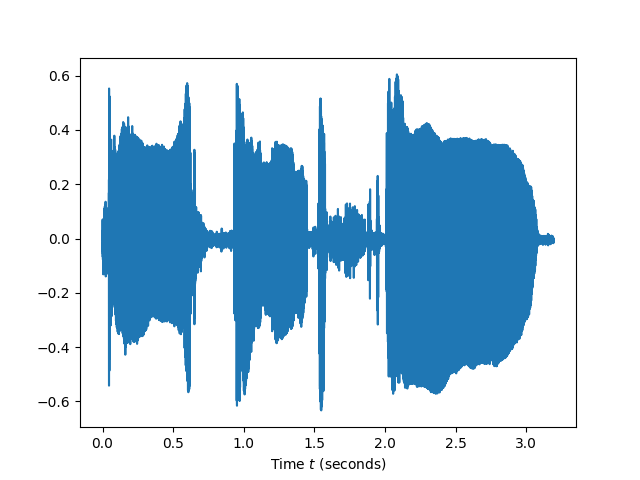

In [15]:
from IPython.display import Audio
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

fs, data = wavfile.read(r'../data/orca.wav') # Load the audio file 'orca.wav' and store information in the variables 'fs' and 'data.
xn = data/0x8000

# Use the sample rate to calculate a array of timestamps 'tn' with length equal to that of the audio file
tn = np.arange(len(xn))/fs

plt.close(3); plt.figure(3)
plt.plot(tn, xn)
plt.xlabel("Time $t$ (seconds)")

# System model example for DSP sytem
<br><br>
<img src="figures/Fig10_SampleSys.png" style="width: 80%; margin-left: 100px" />

# Possible model realization in Arduino C
---
>```C++
>const int INPUT_PIN = A0; // Analog inngang
>const int T_S = 50;       // Sampleperiode i millisekund
>
>int buffer[512] = {};
>i=0;
>
>unsigned long next_sample_time = 0;
>
>void setup() {
>  pinMode(INPUT_PIN, INPUT);
>}
>```
>```C++
>void loop() {
>  if(millis() >= next_sample_time){
>    next_sample_time += T_S;
>    int new_sample = analogRead(INPUT_PIN);
>    buffer[i] = new_sample;
>    i++;
>    i%=0;
>    /* -----------------------------------
>     * Digital Signal Processing Happens Here!
>     * -----------------------------------
>     */
>  }
>  if (i == 0){
>   // Send buffer over USB etc   
>  }
>}
>```
---

As you may suspect, there are more reliable ways to achieve precise and high-speed uniform sampling. We will explore these further in lab 3.

# Example
1. An analog recording is sampled using a sampling frequency $f_s = 8000Hz$. The first sample is taken at time $=0$.
    - Which samples represent the audio recording in the time interval $0.25s \leq t < 0.625s$?
    - Assuming 16 bits per sample, how much storage space is required to store one secoond of recording?

# Processing the discretized signals

* Once we have the sampled signal values, they are typically processed using basic mathematical operations

<img src="figures/Fig9_Blocks.png" style="width: 80%" />

# Two common LTI systems

1. ***Moving Average Filter:***
    * Each sample in the output signal $y[n]$ is the average of $L$ most recent samples of the input $x[n]$
    * Example: 5-point moving average filter
$$y[n] = \frac{1}{5}x[n] + \frac{1}{5}x[n-1] + \frac{1}{5}x[n-2] + \frac{1}{5}x[n-3] + \frac{1}{5}x[n-4]$$


2. ***Exponential Averager:***
    * Output $y[n]$ is calculated based on previous output $y[n-1]$ and current input $x[n]$
    * Example:
$$y[n] = 0.9 \cdot y[n-1] + 0.1 \cdot x[n]$$

(0.0, 127.0)

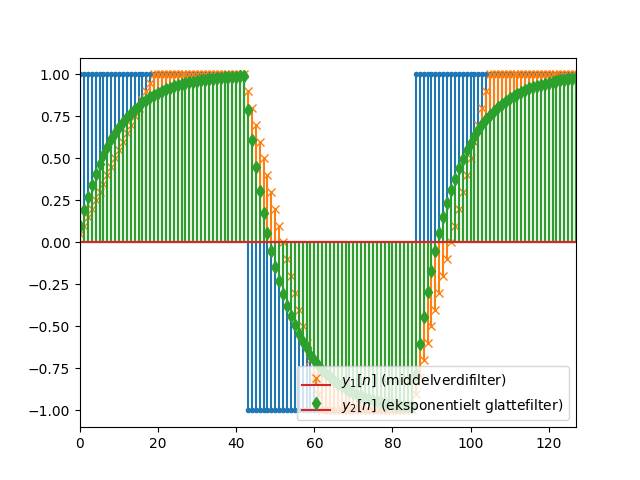

In [13]:
import scipy.signal as sig
import numpy as np
%matplotlib ipympl

N = 128
n = np.arange(N)
xn = sig.square(2*np.pi*1.5*n/N)

a_1, b_1 = [1], np.ones(20)/20
a_2, b_2 = [1, -0.9], [0.1]

y1 = sig.lfilter(b_1, a_1, xn)
y2 = sig.lfilter(b_2, a_2, xn)

plt.figure()
plt.stem(xn, markerfmt='.')
plt.stem(y1, markerfmt="x", linefmt="C1", label="$y_1[n]$ (middelverdifilter)")
plt.stem(y2, markerfmt="d", linefmt="C2", label="$y_2[n]$ (eksponentielt glattefilter)")
plt.legend(loc="lower right")
plt.xlim([0, N-1])

## Example: LTI system implementation on Arduino
---
>```C++
>float prev_y = 0;        // Global variable to store one sample between function calls
>const float ALPHA = 0.9; // Scaling constants in the filter (filter coefficients)
>
>/* Function to process one single input value 'x', and return 
> *  a output sample 'y' using an exponential averaging filter.
> *  Filter response time is determined by the global constant
> *  ALPHA.
> */
>float filter_sample(float x)
>{
>  float y = prev_y*ALPHA; // Perform scaling of y[n-1] by ALPHA
>  y += x*(1-ALPHA); // Perform scaling of x[n] by (1-ALPHA), and add to y[n]
>  prev_y = y; 
>  /* Store the newly newly calculated output y[n] in variable "prev_y".
>   * "prev_y" will now contain the correct value for y[n-1] the next time 
>   * "filter_sample"is called. */
>  return y;
>}
>```
---

# Any Questions?